[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/126MBJ2SJuSEnUL7TbBpp76FShuCh25Im?usp=sharing)


# **Método Simplex Revisado**

## **Importaciones Necesarias**

In [ ]:
!pip install ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
from sympy import symbols, Eq, solve
import warnings
warnings.filterwarnings("ignore")


## **Ingreso del modelo**

In [2]:
#Función para crear los elemetos de ingreso del modelo
def create_input_fields(b):

    num_variables = int(num_variables_selector.value)
    num_restrictions = int(num_restrictions_selector.value)

    # Creando widgets para la función objetivo
    function_entries.clear()
    for i in range(num_variables):
        function_entries.append(widgets.FloatText(description=f"X{i + 1}"))

    # Creando widgets para las restricciones
    restriction_entries.clear()
    restriction_types.clear()
    restriction_constants.clear()
    for i in range(num_restrictions):
        entries = [widgets.FloatText(description=f"X{j + 1}") for j in range(num_variables)]
        restriction_entries.append(entries)
        restriction_types.append(widgets.Dropdown(options=["≤", "≥", "="], description="Tipo:", disabled=True))
        restriction_constants.append(widgets.FloatText(description="Término independiente:"))

    # Mostrar widgets de entrada para la función objetivo y restricciones
    display(widgets.VBox([widgets.HTML("<b>Función Objetivo:</b>")] + function_entries))
    restriction_inputs = [widgets.VBox([widgets.HTML(f"<b>Restricción {i + 1}:</b>")] + entries + [restriction_types[i], restriction_constants[i]]) for i, entries in enumerate(restriction_entries)]
    display(widgets.VBox(restriction_inputs))
    display(show_results_button)
    display(reset_button)

    # Ocultando elementos no presentes
    show_results_button.disabled = False
    reset_button.disabled = False
    operation_selector.disabled = True
    num_variables_selector.disabled = True
    num_restrictions_selector.disabled = True
    accept_button.disabled = True


# Función para mostrar el modelo ingresado
def show_results(b):
    global equations, solutions

    # Validar que no haya coeficientes de la función objetivo iguales a cero
    zero_coefficients = [i + 1 for i, entry in enumerate(function_entries) if entry.value == 0]
    if zero_coefficients:
        error_message = "Error: Los siguientes coeficientes de la función objetivo son cero y deben ser distintos de cero: "
        error_message += ", ".join(f"X{i}" for i in zero_coefficients)
        print(error_message)
    else:
        print("\n\nLa Formulación del problema es:")
        print("\nFunción Objetivo:")
        print(f"{operation_selector.value} Z = ", end="")
        for i, entry in enumerate(function_entries):
            print(f"({entry.value})X{i + 1}", end=" + " if i < len(function_entries) - 1 else "\n")

        print("\nCon Restricciones:")
        for i, (entries, type_entry, constant_entry) in enumerate(zip(restriction_entries, restriction_types, restriction_constants)):
            print(f"Restricción {i + 1}:")

            equation_str = ' + '.join([f'({entry.value})*X{j + 1}' for j, entry in enumerate(entries)]) + f' {type_entry.value} {constant_entry.value}'
            equation_strings.append(equation_str)
            #print(equation_str)

        print("")
        for i, entry in enumerate(function_entries):
          if i < len(function_entries) - 1:
              print(f"X{i + 1}, ", end="")
          else:
              print(f"X{i + 1} >= 0")

        show_results_fa()


# Funcion para mostrar la forma aumentada
def show_results_fa():

    print("\n\nLa Forma Aumentada es:")
    print(f"{operation_selector.value} Z = ", end="")
    for i, entry in enumerate(function_entries):
        print(f"({entry.value})X{i + 1}", end=" + " if i < len(function_entries) - 1 else " + ",)

    for i in range(len(restriction_entries)):
        print(f"(0)S{i + 1}", end=" + " if i < len(restriction_entries) - 1 else "\n")

    print("\nCon Restricciones:")
    for i, (entries, type_entry, constant_entry) in enumerate(zip(restriction_entries, restriction_types, restriction_constants)):
        print(f"Restricción {i + 1}:")
        for j, entry in enumerate(entries):
            print(f"({entry.value})X{j + 1}", end=" + " if j < len(entries) - 1 else "",)
        print(f" + (1)S{i + 1} = {constant_entry.value}\n")

    j=0
    for i in range(len(function_entries) + len(restriction_entries)):
        if i < len(function_entries):
            print(f"X{i + 1}, ", end="")

        elif i < len(function_entries) + len(restriction_entries) -1:
            print(f"S{j + 1}, ", end="")
            j+=1

        else:
            print(f"S{j + 1} >= 0")
            j+=1


#Función para reiniciar el ingreso del modelo
def reset_input_fields(b):

    clear_output()
    operation_selector.disabled = False
    num_variables_selector.disabled = False
    num_restrictions_selector.disabled = False
    accept_button.disabled = False
    main()


# Funcion principal para ejecutar el ingreso del modelo
def main():
    display(widgets.HTML("<b>Ingreso de parámetros - Método Simplex Revisado:</b>"))
    display(operation_selector, num_variables_selector, num_restrictions_selector, accept_button)


In [3]:
# Variables y elementos necesarios para el ingreso del modelo
operation_selector = widgets.Dropdown(
    options=["Maximizar", "Minimizar"],
    value="Maximizar",
    description="Tipo de operación:"
)

num_variables_selector = widgets.Dropdown(
    options=[2, 3, 4, 5],
    value=2,
    description="Número de variables:"
)

num_restrictions_selector = widgets.Dropdown(
    options=[1, 2, 3, 4, 5],
    value=2,
    description="Número de restricciones:"
)

# Botones de interación
accept_button = widgets.Button(description="Aceptar")
accept_button.on_click(create_input_fields)

show_results_button = widgets.Button(description="Mostrar Modelo")
show_results_button.on_click(show_results)
show_results_button.disabled = True

reset_button = widgets.Button(description="Reiniciar")
reset_button.on_click(reset_input_fields)
reset_button.disabled = True

function_entries = []
restriction_entries = []
restriction_types = []
restriction_constants = []
equation_strings = []

if __name__ == "__main__":
    main()


HTML(value='<b>Ingreso de parámetros - Método Simplex Revisado:</b>')

Dropdown(description='Tipo de operación:', options=('Maximizar', 'Minimizar'), value='Maximizar')

Dropdown(description='Número de variables:', options=(2, 3, 4, 5), value=2)

Dropdown(description='Número de restricciones:', index=1, options=(1, 2, 3, 4, 5), value=2)

Button(description='Aceptar', style=ButtonStyle())

Button(description='Mostrar Modelo', disabled=True, style=ButtonStyle())

Button(description='Reiniciar', disabled=True, style=ButtonStyle())



La Formulación del problema es:

Función Objetivo:
Maximizar Z = (3.0)X1 + (5.0)X2

Con Restricciones:
Restricción 1:
Restricción 2:
Restricción 3:

X1, X2 >= 0


La Forma Aumentada es:
Maximizar Z = (3.0)X1 + (5.0)X2 + (0)S1 + (0)S2 + (0)S3

Con Restricciones:
Restricción 1:
(1.0)X1 + (0.0)X2 + (1)S1 = 4.0

Restricción 2:
(0.0)X1 + (2.0)X2 + (1)S2 = 12.0

Restricción 3:
(3.0)X1 + (2.0)X2 + (1)S3 = 18.0

X1, X2, S1, S2, S3 >= 0


In [ ]:
print("\noperation_selector\n", operation_selector.value)
print("\nnum_variables_selector\n", num_variables_selector.value)
print("\nnum_restrictions_selector\n", num_restrictions_selector.value)
print("\nfunction_entries\n", function_entries)
print("\nrestriction_entries\n", restriction_entries)



operation_selector
 Maximizar

num_variables_selector
 2

num_restrictions_selector
 3

function_entries
 [FloatText(value=3.0, description='X1'), FloatText(value=5.0, description='X2')]

restriction_entries
 [[FloatText(value=1.0, description='X1'), FloatText(value=0.0, description='X2')], [FloatText(value=0.0, description='X1'), FloatText(value=2.0, description='X2')], [FloatText(value=3.0, description='X1'), FloatText(value=2.0, description='X2')]]


## **Cálculo de las matrices iniciales, esxtrayendo el modelo ingresado**

In [7]:
# Calculando matrices iniciales, Extraer los valores capturados
values = [item.value for item in function_entries]
c= np.array(values, dtype=np.float)

#Min(Z)=-Max(Z)
if(operation_selector.value=="Minimizar"):
  c=c*-1
print("\n c \n",c)

values = [[element.value for element in row] for row in restriction_entries]
a=np.array(values, dtype=np.float)
print("\n a \n",a)

I=np.eye(num_restrictions_selector.value)
print("\n I \n",I)

a_I=np.concatenate((a, I), axis=1)
print("\n a_I \n",a_I)

values = [item.value for item in restriction_constants]
b= np.array(values, dtype=np.float)
print("\n b \n",b)

values = [item.description for item in function_entries]
x=  np.array(values, dtype=np.str)
print("\n x \n",x)

x_b_labels=  ['S' + str(i) for i in range(1, num_restrictions_selector.value + 1)]
print("\n x_b_labels \n",x_b_labels)

B=I
print("\n B \n",B)

B_inv=np.linalg.inv(B)
print("\n B_inv \n",B_inv)

x_b=np.dot(B_inv, b)
print("\n x_b \n",x_b)

c_b=np.zeros(num_restrictions_selector.value)
print("\n c_b \n",c_b)

z=np.dot(c_b, x_b)
z= np.array(z, dtype=np.float)
print("\n z \n",z)

# Diccionario de variables
diccionario_variables = dict(zip(["Z"], [0]))
diccionario_variables.update(dict(zip(x, c)))
diccionario_variables.update(dict(zip(x_b_labels, c_b)))
print("\n diccionario_variables \n", diccionario_variables)

# Inicialización de algunas variables necesarias
a_=[]
b_=[]
c_=[]
d_=[]
e_=[]
f_=[]
razon=[]

matriz =[]
filas=[]
columnas=[]



 c 
 [3. 5.]

 a 
 [[1. 0.]
 [0. 2.]
 [3. 2.]]

 I 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

 a_I 
 [[1. 0. 1. 0. 0.]
 [0. 2. 0. 1. 0.]
 [3. 2. 0. 0. 1.]]

 b 
 [ 4. 12. 18.]

 x 
 ['X1' 'X2']

 x_b_labels 
 ['S1', 'S2', 'S3']

 B 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

 B_inv 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

 x_b 
 [ 4. 12. 18.]

 c_b 
 [0. 0. 0.]

 z 
 0.0

 diccionario_variables 
 {'Z': 0, 'X1': 3.0, 'X2': 5.0, 'S1': 0.0, 'S2': 0.0, 'S3': 0.0}


## **Construccion de la Matriz General**

In [5]:
# Calculando matriz general
def matriz_general():
  global a_, b_, c_, d_, e_, f_, razon

  print("\nCALCULANDO MATRIZ GENERAL")

  cb_binv = np.dot(c_b, B_inv)
  cb_Binv_a_negc = np.dot(cb_binv, a)-c
  print("\n 1) cb_Binv_a_negc \n",cb_Binv_a_negc)
  a_=cb_Binv_a_negc

  print("\n 2) cb_binv \n",cb_binv)
  b_=cb_binv

  cb_binv_b = z
  print("\n 3) cb_binv_b \n",cb_binv_b)
  c_=cb_binv_b

  binv_a = np.dot(B_inv, a)
  print("\n 4) binv_a \n",binv_a)
  d_=binv_a

  binv = B_inv
  print("\n 5) binv \n",binv)
  e_=binv

  binv_b = x_b
  print("\n 6) binv_b \n",binv_b)
  f_=binv_b

  razon=np.zeros(num_restrictions_selector.value+1)
  print("\n razon \n",razon)

def concatenar_matriz_general():
  global filas, columnas, matriz

  print("\nCONCATENANDO MATRIZ GENERAL")

  columnas = np.hstack((x, x_b_labels, "Lado Der", "Razon"))

  if(i==0):
    filas = np.hstack(("Z", x_b_labels))

  # Concatenando las matrices "a", "b" y "c"
  abc_mat = np.hstack((a_, b_, c_))
  #print(abc_mat)

  # Concatenar las matrices "d", "e" y "f"
  def_mat = np.hstack((d_, e_, f_.reshape(-1, 1)))
  #print(def_mat)

  matriz = np.vstack((abc_mat, def_mat))
  matriz = np.hstack((matriz, razon.reshape(-1, 1)))


## **Iteraciones Del Método Simplex Revisado**

In [8]:
i=0
while i!=-1:

  print(f"\n------------------ ITERACIÓN {i} ---------------")

  # Error en caso de divergencia
  if(i==100):
    print("ERROR! Se ha alcanzado un número grande de iteraciones, probablemente el problema no tiene una solución óptima")
    break

  # Cálculo iteración cero
  if(i==0):
    matriz_general()
    concatenar_matriz_general()

  # Cálculo resto de iteraciones (Recalculando matrices individuales, a partir de las matrices anteriores)
  else:
    B = df.loc[filas[1:], filas[1:]].values
    print("\n B \n", B)

    B_inv=np.linalg.inv(B)
    print("\n B_inv \n",B_inv)

    b=df['Lado Der'][1:].values
    print("\n b \n", b)

    c_b=np.array([diccionario_variables[clave] for clave in filas[1:]])
    print("\n c_b \n", c_b)

    x_b=np.dot(B_inv, b)
    print("\n x_b \n",x_b)

    z=np.dot(c_b, x_b)
    z= np.array(z, dtype=np.float)
    print("\n z \n",z)

    # Calculando matriz general nuevamente
    matriz_general()
    concatenar_matriz_general();

  # Actualizando el Dataframe
  print()
  df = pd.DataFrame(matriz, columns=columnas, index=filas)
  df= df.drop(['Razon'], axis=1)
  styled_df = df.style.format("{:.2f}")
  styled_df = styled_df.set_caption("Método simplex revisado - Iteración: {}".format(i))
  display(styled_df)
  print()

  # PRUEBA DE OPTIMALIDAD
  # Seleccionando la fila cero
  fila_cero = np.array(df.loc['Z'][:-2])
  print("fila Z= ", fila_cero)

  # Encontrando los índices de los valores negativos en la fila cero
  indices_negativos = np.where(fila_cero < 0)

  # Se verifica si hay valores negativos
  if len(indices_negativos[0]) > 0:

      # Extrayendo el indice y valor absoluto máximo
      indice_maximo_absoluto = np.argmax(np.abs(fila_cero))
      valor_maximo_absoluto = fila_cero[indice_maximo_absoluto]
      print("Índice del valor absoluto máximo en la fila cero:", indice_maximo_absoluto)
      print("Valor máximo absoluto en la fila cero:", valor_maximo_absoluto)

      # Calculando la razon
      # Obteniendo los dividendos (Lado derecho)
      dividendos = np.array(df['Lado Der'])
      print("Dividendos (Lado derecho) ", dividendos)

      # Obteniendo los divisores (Columna Pivote)
      divisores = np.array(df.iloc[:, indice_maximo_absoluto])
      print("Divisores (Columna Pivote)", divisores)

      # Realizando las divisiones
      divisiones = dividendos / divisores
      razon=divisiones.round(2)
      print("razon", razon)

      # Encontrando el valor e índice mínimo no negativo
      valor_minimo= razon[razon > 0].min()
      indice_minimo= np.where(razon == valor_minimo)[0][0]

      # Actualizando la razón
      matriz[:, -1] = razon
      df["Razon"]=razon

      print("\nNUEVA TABLA CON EL CÁLCULO DE LA RAZÓN")
      # Índices de las celdas a resaltar de la columna pivote y el valor mínimo
      pivote=df.columns[indice_maximo_absoluto]
      fila_resaltar = indice_minimo
      columna_resaltar = -1
      print()

      styled_df = df.style.format("{:.2f}")
      styled_df = styled_df.set_caption("Método simplex revisado - Iteración: {}".format(i))
      styled_df = styled_df.applymap(lambda x: 'background-color: yellow', subset=pd.IndexSlice[filas[:], columnas[indice_maximo_absoluto]])
      styled_df = styled_df.applymap(lambda x: 'background-color: lightblue', subset=pd.IndexSlice[filas[fila_resaltar], columnas[columna_resaltar]])
      display(styled_df)
      print()

      # Datos adicionales
      print(f'El valor minimo es {valor_minimo} y se encuentra en el indice {indice_minimo}.')
      print("Entra ", columnas[indice_maximo_absoluto], " Sale", filas[indice_minimo])
      filas[indice_minimo]=columnas[indice_maximo_absoluto]
      print("Nuevas Filas", filas)
      print("Nuevas Columnas", columnas)
      df = pd.DataFrame(matriz, columns=columnas, index=filas)

      i=i+1

  # Se ha encontrado la solución general
  else:
    print("\nNo hay valores negativos en la fila Z.")
    print("Se ha encontrado la solución factible.")
    print("\nLa solución óptima es:")
    lado_der=df['Lado Der']

    for label, valor in zip(filas, lado_der):
      diccionario_variables[label] = valor

    print(diccionario_variables)
    i=-1



------------------ ITERACIÓN 0 ---------------

CALCULANDO MATRIZ GENERAL

 1) cb_Binv_a_negc 
 [-3. -5.]

 2) cb_binv 
 [0. 0. 0.]

 3) cb_binv_b 
 0.0

 4) binv_a 
 [[1. 0.]
 [0. 2.]
 [3. 2.]]

 5) binv 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

 6) binv_b 
 [ 4. 12. 18.]

 razon 
 [0. 0. 0. 0.]

CONCATENANDO MATRIZ GENERAL



,X1,X2,S1,S2,S3,Lado Der
Z,-3.00,-5.00,0.00,0.00,0.00,0.00
S1,1.00,0.00,1.00,0.00,0.00,4.00
S2,0.00,2.00,0.00,1.00,0.00,12.00
S3,3.00,2.00,0.00,0.00,1.00,18.00



fila Z=  [-3. -5.  0.  0.]
Índice del valor absoluto máximo en la fila cero: 1
Valor máximo absoluto en la fila cero: -5.0
Dividendos (Lado derecho)  [ 0.  4. 12. 18.]
Divisores (Columna Pivote) [-5.  0.  2.  2.]
razon [-0. inf  6.  9.]

NUEVA TABLA CON EL CÁLCULO DE LA RAZÓN



,X1,X2,S1,S2,S3,Lado Der,Razon
Z,-3.00,-5.00,0.00,0.00,0.00,0.00,-0.00
S1,1.00,0.00,1.00,0.00,0.00,4.00,inf
S2,0.00,2.00,0.00,1.00,0.00,12.00,6.00
S3,3.00,2.00,0.00,0.00,1.00,18.00,9.00



El valor minimo es 6.0 y se encuentra en el indice 2.
Entra  X2  Sale S2
Nuevas Filas ['Z' 'S1' 'X2' 'S3']
Nuevas Columnas ['X1' 'X2' 'S1' 'S2' 'S3' 'Lado Der' 'Razon']

------------------ ITERACIÓN 1 ---------------

 B 
 [[1. 0. 0.]
 [0. 2. 0.]
 [0. 2. 1.]]

 B_inv 
 [[ 1.   0.   0. ]
 [ 0.   0.5  0. ]
 [ 0.  -1.   1. ]]

 b 
 [ 4. 12. 18.]

 c_b 
 [0. 5. 0.]

 x_b 
 [4. 6. 6.]

 z 
 30.0

CALCULANDO MATRIZ GENERAL

 1) cb_Binv_a_negc 
 [-3.  0.]

 2) cb_binv 
 [0.  2.5 0. ]

 3) cb_binv_b 
 30.0

 4) binv_a 
 [[1. 0.]
 [0. 1.]
 [3. 0.]]

 5) binv 
 [[ 1.   0.   0. ]
 [ 0.   0.5  0. ]
 [ 0.  -1.   1. ]]

 6) binv_b 
 [4. 6. 6.]

 razon 
 [0. 0. 0. 0.]

CONCATENANDO MATRIZ GENERAL



,X1,X2,S1,S2,S3,Lado Der
Z,-3.00,0.00,0.00,2.50,0.00,30.00
S1,1.00,0.00,1.00,0.00,0.00,4.00
X2,0.00,1.00,0.00,0.50,0.00,6.00
S3,3.00,0.00,0.00,-1.00,1.00,6.00



fila Z=  [-3.   0.   0.   2.5]
Índice del valor absoluto máximo en la fila cero: 0
Valor máximo absoluto en la fila cero: -3.0
Dividendos (Lado derecho)  [30.  4.  6.  6.]
Divisores (Columna Pivote) [-3.  1.  0.  3.]
razon [-10.   4.  inf   2.]

NUEVA TABLA CON EL CÁLCULO DE LA RAZÓN



,X1,X2,S1,S2,S3,Lado Der,Razon
Z,-3.00,0.00,0.00,2.50,0.00,30.00,-10.00
S1,1.00,0.00,1.00,0.00,0.00,4.00,4.00
X2,0.00,1.00,0.00,0.50,0.00,6.00,inf
S3,3.00,0.00,0.00,-1.00,1.00,6.00,2.00



El valor minimo es 2.0 y se encuentra en el indice 3.
Entra  X1  Sale S3
Nuevas Filas ['Z' 'S1' 'X2' 'X1']
Nuevas Columnas ['X1' 'X2' 'S1' 'S2' 'S3' 'Lado Der' 'Razon']

------------------ ITERACIÓN 2 ---------------

 B 
 [[1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 3.]]

 B_inv 
 [[ 1.          0.         -0.33333333]
 [ 0.          1.          0.        ]
 [ 0.          0.          0.33333333]]

 b 
 [4. 6. 6.]

 c_b 
 [0. 5. 3.]

 x_b 
 [2. 6. 2.]

 z 
 36.0

CALCULANDO MATRIZ GENERAL

 1) cb_Binv_a_negc 
 [0. 7.]

 2) cb_binv 
 [0. 5. 1.]

 3) cb_binv_b 
 36.0

 4) binv_a 
 [[ 5.55111512e-17 -6.66666667e-01]
 [ 0.00000000e+00  2.00000000e+00]
 [ 1.00000000e+00  6.66666667e-01]]

 5) binv 
 [[ 1.          0.         -0.33333333]
 [ 0.          1.          0.        ]
 [ 0.          0.          0.33333333]]

 6) binv_b 
 [2. 6. 2.]

 razon 
 [0. 0. 0. 0.]

CONCATENANDO MATRIZ GENERAL



,X1,X2,S1,S2,S3,Lado Der
Z,0.00,7.00,0.00,5.00,1.00,36.00
S1,0.00,-0.67,1.00,0.00,-0.33,2.00
X2,0.00,2.00,0.00,1.00,0.00,6.00
X1,1.00,0.67,0.00,0.00,0.33,2.00



fila Z=  [0. 7. 0. 5.]

No hay valores negativos en la fila Z.
Se ha encontrado la solución factible.

La solución óptima es:
{'Z': 36.0, 'X1': 2.0, 'X2': 6.0, 'S1': 2.0, 'S2': 0.0, 'S3': 0.0}


## Gráfica de resultados

Restricciones:
 ['(1.0)*X1 + (0.0)*X2 ≤ 4.0', '(0.0)*X1 + (2.0)*X2 ≤ 12.0', '(3.0)*X1 + (2.0)*X2 ≤ 18.0']


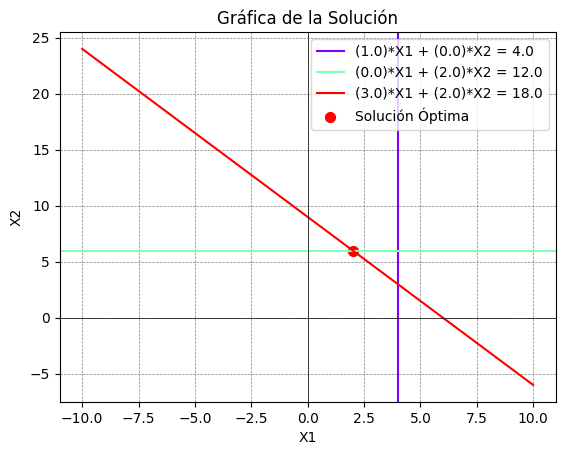

In [9]:
if (num_variables_selector.value==2):
  print("Restricciones:\n", equation_strings)

  X1, X2 = symbols('X1 X2')
  valor_X1 = diccionario_variables.get('X1', 0.0)
  valor_X2 = diccionario_variables.get('X2', 0.0)
  x_values = np.linspace(-10, 10, 100)
  colores = plt.cm.rainbow(np.linspace(0, 1, len(equation_strings)))

  # Graficando cada Restricción
  for eq_str, color in zip(equation_strings, colores):

      eq_str = eq_str.replace('≤', '=')
      eq = Eq(eval(eq_str.split('=')[0]), float(eq_str.split('=')[1]))

      # Es necesaio validar si la restricción acompaña las 2 variables, o sólo es una línea que corta al eje
      variables_presentes = [var for var in [X1, X2] if eq.lhs.coeff(var) != 0]

      # Para graficar una recta en el eje correspondiente
      if len(variables_presentes) == 1:
          variable = variables_presentes[0]
          valor_constante = eq.rhs / eq.lhs.coeff(variable)
          if variable == X1:
              plt.axvline(valor_constante, color=color, label=f'{eq_str}')
          elif variable == X2:
              plt.axhline(valor_constante, color=color,label=f'{eq_str}')

      # Es una expresión que se debe graficar utilizando valores de Y, dado unos valores de X
      else:
          solution = solve(eq, X2)
          y_values = np.array([solution[0].subs(X1, x) for x in x_values])
          plt.plot(x_values, y_values, color=color, label=f'{eq_str}')

  plt.scatter(valor_X1, valor_X2, color='red', marker='o', label='Solución Óptima', s=50)# Punto de la solución óptima
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.axhline(0, color='black', linewidth=0.5)
  plt.axvline(0, color='black', linewidth=0.5)
  plt.grid(color='gray', linestyle='--', linewidth=0.5)
  plt.legend()
  plt.title('Gráfica de la Solución')
  plt.show()

else:
  print("Error, gráfica disponible sólo para 2 variables")
